In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv('census_income.csv').

df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
df.shape

(32560, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df1 = df.select_dtypes(include=['object']).columns
df1

Index(['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native_country', 'Income'],
      dtype='object')

In [7]:
df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [8]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
df1 = df.select_dtypes(include=['int64']).columns
df1

Index(['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss',
       'Hours_per_week'],
      dtype='object')

<Figure size 1152x720 with 0 Axes>

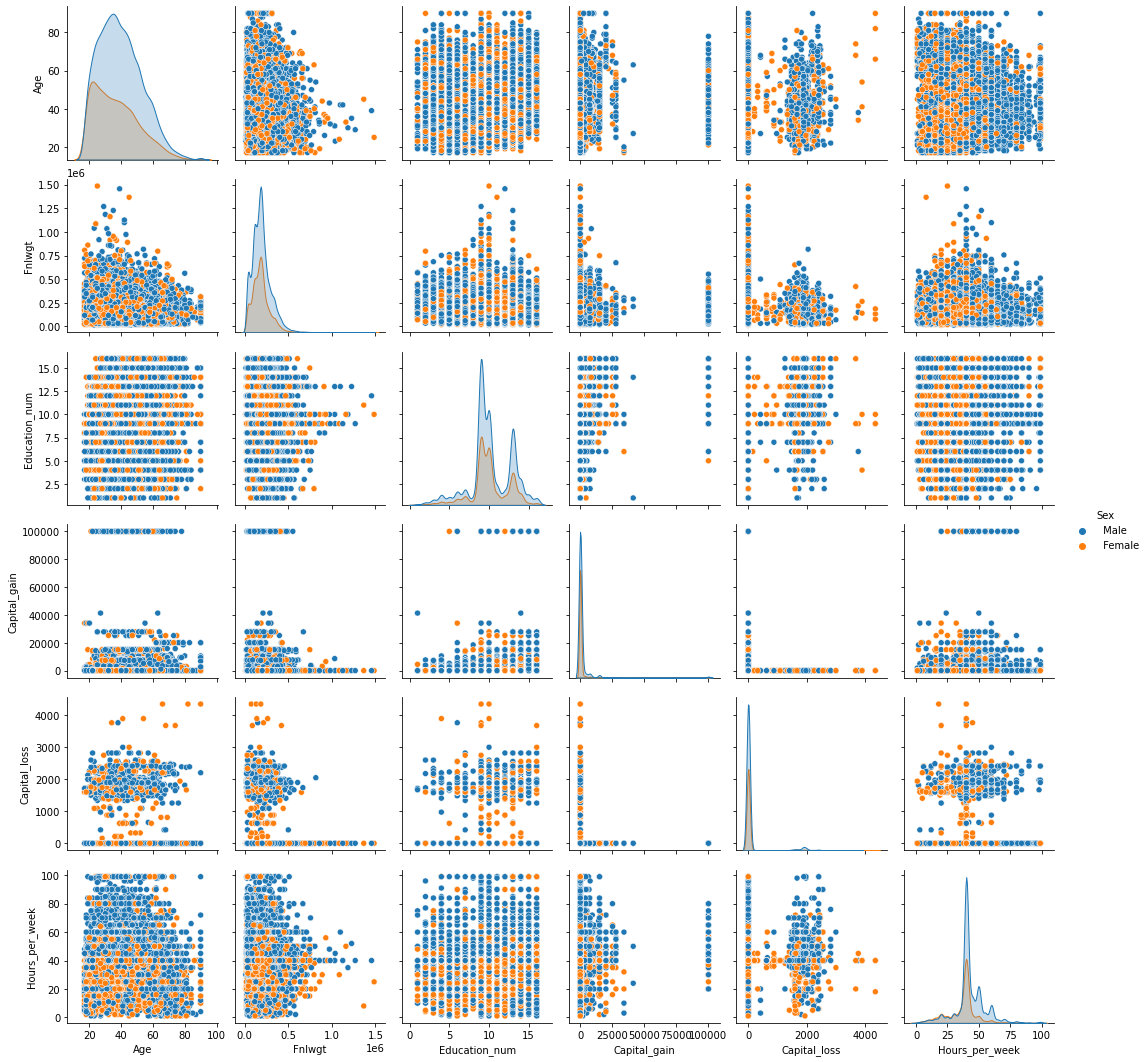

In [10]:
plt.figure(1, figsize=(16,10))
sns.pairplot(data=df, hue='Sex')
plt.show()

# Distribution of values

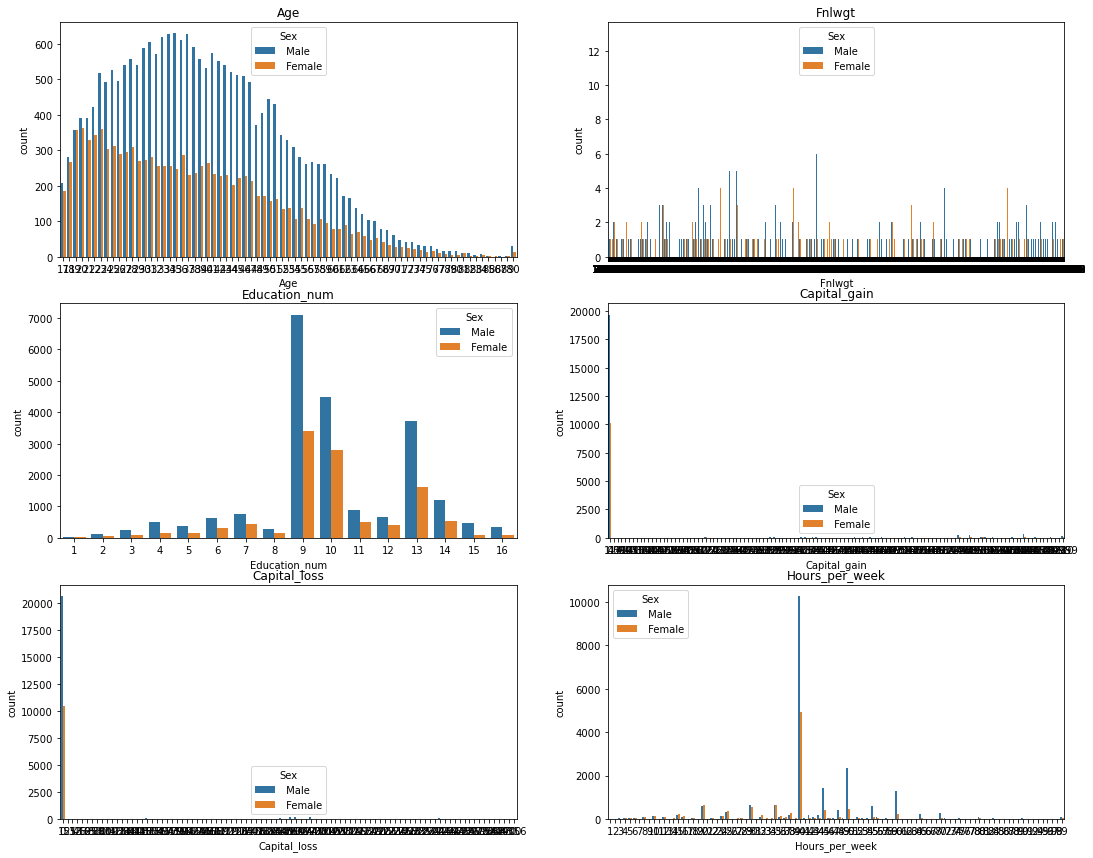

In [11]:
plt.figure(figsize=(18,25))
plt.subplot(521)

i=0
for c in df1:
    plt.subplot(5, 2, i+1)
    i += 1
    sns.countplot(x=c, data=df, hue='Sex')
    plt.title(c)

plt.show()




There are far more male earning >50k than female, but at the same time there are also more male earning <50k and even more males recorded in general. The counts need to be normalized.

In [18]:
df['Income'] = pd.get_dummies(df['Income'], prefix='Income', drop_first=True)

In [19]:
y = df.Income
df = df.drop(columns=['Income'])

In [20]:
print(f'Ratio above 50k:  {y.sum()/len(y)*100:.2f}%')

Ratio above 50k:  24.08%


In [21]:
df1 = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

In [22]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States


In [23]:
cols = list(df.columns)
cols

['Age',
 'Workclass',
 'Fnlwgt',
 'Education',
 'Education_num',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week',
 'Native_country']

In [27]:
selected_feat = cols.copy()
selected_feat

['Age',
 'Workclass',
 'Fnlwgt',
 'Education',
 'Education_num',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week',
 'Native_country']

In [28]:
df_final = df[selected_feat]

In [30]:
df1 = df_final.select_dtypes(include=['object']).columns
X = pd.get_dummies(df_final[df1], drop_first=True)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model training and predictions

In [32]:
def print_score(model, name):
    model.fit(X_train, y_train)
    print('Accuracy score of the', name, f': on train = {model.score(X_train, y_train)*100:.2f}%, on test = {model.score(X_test, y_test)*100:.2f}%')

In [33]:
#Logistic regression
print_score(LogisticRegression(), 'LogisticReg')

Accuracy score of the LogisticReg : on train = 83.02%, on test = 84.04%


In [34]:
#Decision Treeclassifier
print_score(DecisionTreeClassifier(), 'DecisionTreeClf')

Accuracy score of the DecisionTreeClf : on train = 86.66%, on test = 82.19%


In [35]:
#Random Forest
rf = RandomForestClassifier().fit(X_train, y_train)
print(f'Accuracy score of the RandomForrest: on train = {rf.score(X_train, y_train)*100:.2f}%, on test = {rf.score(X_test, y_test)*100:.2f}%')

Accuracy score of the RandomForrest: on train = 86.66%, on test = 83.02%


In [36]:
# Extra treeclassifier
print_score(DecisionTreeClassifier(), 'ExtraTreesClf')

Accuracy score of the ExtraTreesClf : on train = 86.66%, on test = 82.17%


# Based on Extra Tree Model

<AxesSubplot:>

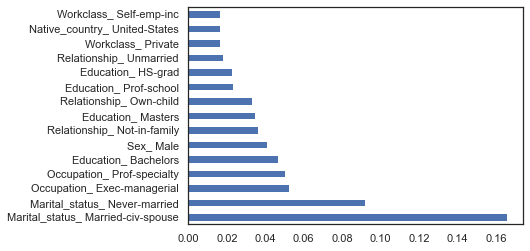

In [37]:
extree = ExtraTreesClassifier().fit(X_train, y_train)
(pd.Series(extree.feature_importances_, index=X_train.columns)
   .nlargest(15)
   .plot(kind='barh'))

 Based on previous analysis during the data exploration stage and by studying the histogram and data plots, we can find our that the following features are relevant as follows and in sequence of importance age , capital gain, capital-loss, education-num, hours-per-week. This analysis was done before the data normalization. The following will describe why are they important
 
Age : Normally there is a tendency that the more experienced individual will have higher level of income

Capital-gain : Normally individual with higher capital gain will tend to spend more money

Capital-loss : we cannot justify this but it could be psychological affect

Education-num : There is a tendency that higher degree the individual is the higher income the individual can generate

hours-per-week : The higher working hours per week the higher income the individual can make

## Logistic Regression is the best model with 84%.